In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.applications import MobileNet
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_rows,img_cols = 224,224

MobileNet = MobileNet(weights='imagenet',include_top=False,input_shape=(img_rows,img_cols,3))



for layer in MobileNet.layers:
    layer.trainable = True


for (i,layer) in enumerate(MobileNet.layers):
    print(str(i),layer.__class__.__name__,layer.trainable)

def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    
    top_model = Dense(1024,activation='relu')(top_model)
    
    top_model = Dense(512,activation='relu')(top_model)
    
    top_model = Dense(num_classes,activation='softmax')(top_model)

    return top_model

num_classes = 3

FC_Head = addTopModelMobileNet(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

train_data_dir = "/kaggle/input/mango-ripness/train"
validation_data_dir = "/kaggle/input/mango-ripness/validation"

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size = (img_rows,img_cols),
                        batch_size = batch_size,
                        class_mode = 'categorical'
                        )

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
                            class_mode='categorical')

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'mangoripeness.keras', 
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)


earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

callbacks = [earlystop,checkpoint,learning_rate_reduction]

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001), 
    metrics=['accuracy']
)


nb_train_samples = 24176
nb_validation_samples = 3006

epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 ReLU True
10 ZeroPadding2D True
11 DepthwiseConv2D True
12 BatchNormalization True
13 ReLU True
14 Conv2D True
15 BatchNormalization True
16 ReLU True
17 DepthwiseConv2D True
18 BatchNormalization True
19 ReLU True
20 Conv2D True
21 BatchNormalization True
22 ReLU True
23 ZeroPadding2D True
24 DepthwiseConv2D True
25 BatchNormalization True
26 ReLU True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 DepthwiseConv2D True
31 BatchNormalization True
32 ReLU True
33 Conv2D True
34 BatchNormalization True
35 ReLU True
36 ZeroPadding2D True
37 DepthwiseConv2D True
38 BatchNormalization True
39 ReLU True
40 Conv2D True
41 BatchNormalization True
42 ReLU True
43 DepthwiseConv2D True
44 BatchNormalization True
45 ReLU True
46 Conv2D True
47 BatchNormalization True

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,854,403 (22.33 MB)

 Trainable params: 5,832,515 (22.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

None
Found 2972 images belonging to 3 classes.
Found 536 images belonging to 3 classes.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 93/755 ━━━━━━━━━━━━━━━━━━━━ 5:49 527ms/step - accuracy: 0.7660 - loss: 0.8262

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 4.51104, saving model to mangoripeness.keras
755/755 ━━━━━━━━━━━━━━━━━━━━ 84s 73ms/step - accuracy: 0.8573 - loss: 0.4798 - val_accuracy: 0.4664 - val_loss: 4.5110 - learning_rate: 0.0010
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


 93/755 ━━━━━━━━━━━━━━━━━━━━ 3:43 338ms/step - accuracy: 0.9267 - loss: 0.2342
Epoch 2: val_loss improved from 4.51104 to 0.18649, saving model to mangoripeness.keras
755/755 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.9326 - loss: 0.2190 - val_accuracy: 0.9328 - val_loss: 0.1865 - learning_rate: 0.0010
Epoch 3/25
 93/755 ━━━━━━━━━━━━━━━━━━━━ 3:42 336ms/step - accuracy: 0.9400 - loss: 0.1974
Epoch 3: val_loss did not improve from 0.18649
755/755 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.9430 - loss: 0.1903 - val_accuracy: 0.9198 - val_loss: 0.2153 - learning_rate: 0.0010
Epoch 4/25
 93/755 ━━━━━━━━━━━━━━━━━━━━ 3:42 336ms/step - accuracy: 0.9567 - loss: 0.1305
Epoch 4: val_loss did not improve from 0.18649
755/755 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - accuracy: 0.9572 - loss: 0.1333 - val_accuracy: 0.9272 - val_loss: 0.4504 - learning_rate: 0.0010
Epoch 5/25
 93/755 ━━━━━━━━━━━━━━━━━━━━ 3:40 333ms/step - accuracy: 0.9525 - loss: 0.1622
Epoch 5: val_loss improved from 0.18649 

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9646 - loss: 0.0813
Validation Loss: 0.0731
Validation Accuracy: 0.9646


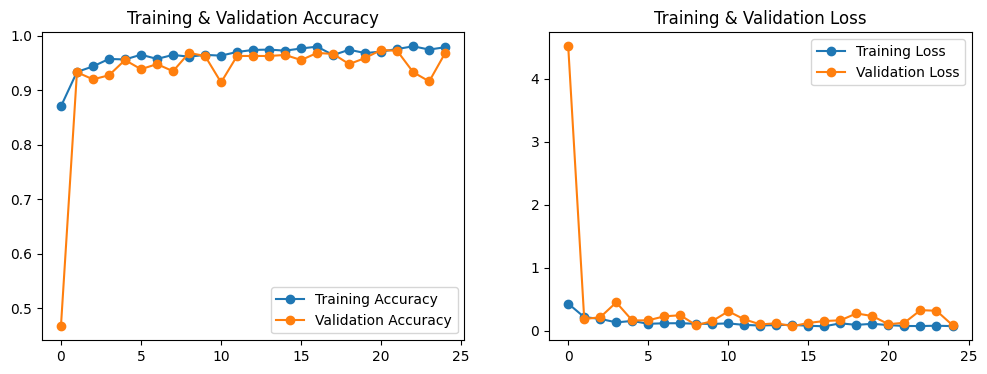

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

model = load_model('mangoripeness.keras')


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

plot_training_history(history)


In [3]:
model.save('mangoripeness.h5')

print("Model saved successfully as 'mangoripeness.h5'")


Model saved successfully as 'mangoripeness.h5'
